# LAB 6 Algorithmic Toolbox – Week 1 – Programming Challenges

Presentado por: David Rojas - Grupo 19 de clase

## Programming Assignment 1: Sum of Two Digits

Codigo subido a coursera:

In [ ]:
#python 3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))


Writing C++ code on file APlusB.c to compile later:

In [ ]:
%%writefile APlusB.cpp

#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

In [ ]:
ls

In [ ]:
%%shell
g++ APlusB.cpp -o output2
./output2

Submission of codes on Coursera:

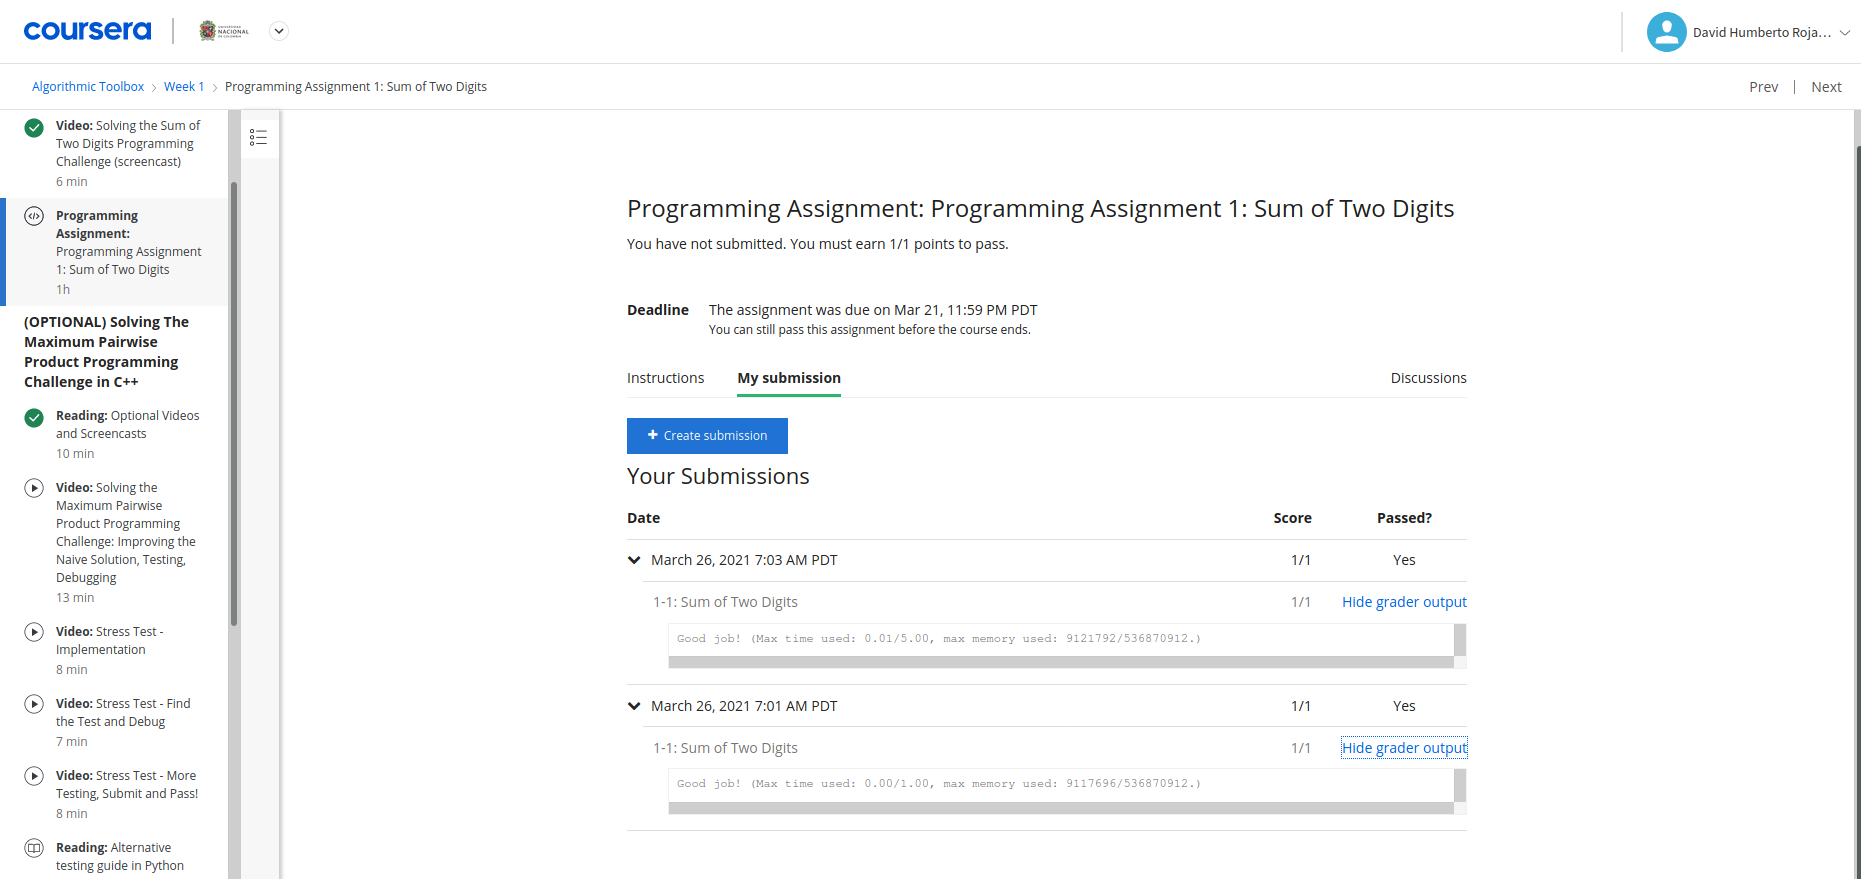

## Solving the Maximum Pairwise Product Programming Challenge


Se intenta resolver el problema del maximo producto de dos numeros maximos en una lista de n numeros.

Primero se resolvio con este codigo dado por el curso, el cual no admitia la operacion de productos grandes y fue necesario cambiar el tipo de variable de *int* a *long long*.

In [ ]:
%%writefile max_pairwise_product.cpp

#include <iostream>
#include <vector>

long long MaxPairwiseProduct(const std::vector<long long>& numbers) {
    long long max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<long long> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers); "\n";
    return 0;
}

In [ ]:
# se va a crear un archivo con 200000 numeros y se va a medir el tiempo
%%writefile n_numbers.cpp
#include <iostream>
using namespace std;
int main() {
    int n=200000;
    cout << n<<"\n";

    for (int i = 0; i < n; ++i) {
        cout << i<<" ";
    }

    return 0;
}

Ya que la maquina asignada por colab usa como SO Linux podemos ejecutar y pasar a txt la solucion

Es importante recordar que cualquier comando linux en colab va precedido por el signo !


In [39]:
!g++ n_numbers.cpp -o n_numbers 
!./n_numbers > n_numbers.txt

In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product2
!time ./max_pairwise_product2 < n_numbers.txt

A continuacion el pantallazo del codigo subido a coursera donde arroja error de time limit exceeded.

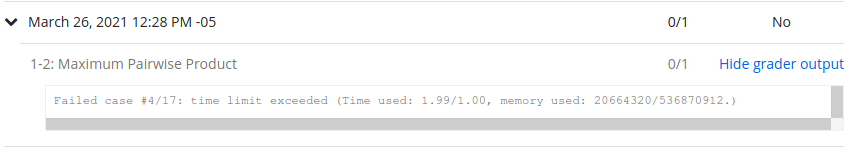

**Maximo producto en C++ fast** es un codigo mas eficiente que el anterior.

In [17]:
%%writefile max_pairwise_product_fast.cpp

#include <iostream>
#include <vector>

long long MaxPairwiseProductFast(const std::vector<int>& numbers) {
    
    int n = numbers.size();

    int max_i_1 = -1;
    for (int i = 0; i < n; ++i)
    {
        if ((max_i_1 == -1) || (numbers[i] > numbers[max_i_1]))
        {
            max_i_1 = i;
        }
        
    }
    
    int max_i_2 = -1;
    for (int j = 0; j < n; ++j)
    {
        if ((numbers[j] != numbers[max_i_1]) && ((max_i_2 == -1) || (numbers[j] > numbers[max_i_2])))
        {
            max_i_2 = j;
        }
        
    }
    

    return ((long long)(numbers[max_i_1])) * numbers[max_i_2];
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProductFast(numbers)<< "\n";
    return 0;
}

Writing max_pairwise_product_fast.cpp


In [ ]:
!g++ max_pairwise_product_fast.cpp -o max_pairwise_product_fast
!time ./max_pairwise_product_fast < n_numbers.txt

Al subir el anterior codigo como respuesta al Juez de coursera, nos arrojo el siegiente resultado

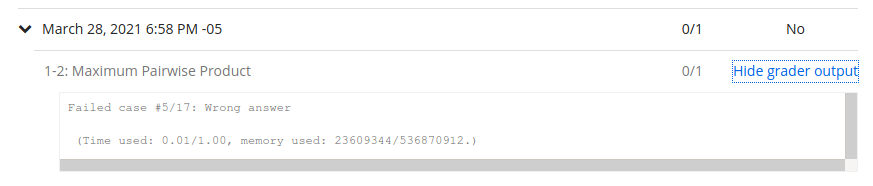

**Maximo producto naive Python**

La siguiente celda de codigo muestra una solucion naive al problema de Maximo producto en Python.

In [ ]:
# python3
%%writefile max_pairwise_product_naive.py

def max_pairwise_product_naive(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product_naive(input_numbers))

In [ ]:
!time python max_pairwise_product_naive.py < n_numbers.txt

A continuacion vemos el anterior codigo en python subido al juez de coursera que nos arroja el siguiente error.

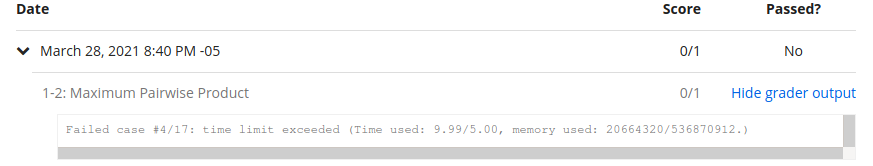

**Max pairwise product fast en Python**

En el siguiente codigo se hara una implementacion mas agil de la solucion planteada para el problema.

In [ ]:
%%writefile max_pairwise_product_fast.py

def max_pairwise_fast(lista): 
    for i in range(0,len(lista)): 
        if(i==0):
            index=0
        elif lista[i]>lista[index]:
            index=i
        else: 
            continue  
    for i in range(0,len(lista)):
        #print(i)
        if(i==0): 
            if(index==0): 
                index2=1
            else: 
                index2=0
        elif lista[i]!=lista[index] and lista[i]>lista[index2]: 
            index2=i
        else: 
            continue 
    #print(lista[index])
    #print(lista[index2])
    return lista[index]*lista[index2] 

if __name__== '__main__':
    n=int(input())
    '''
    a = list(map(int, input().split()))
    print(MaxPairWise(a))
    '''
    b=[int(x) for x in input().split()]
    print(max_pairwise_fast(b))

In [ ]:
!time python max_pairwise_product_fast.py < n_numbers.txt

A continuacion el pantallazo del codigo anterior subido al juez de coursera

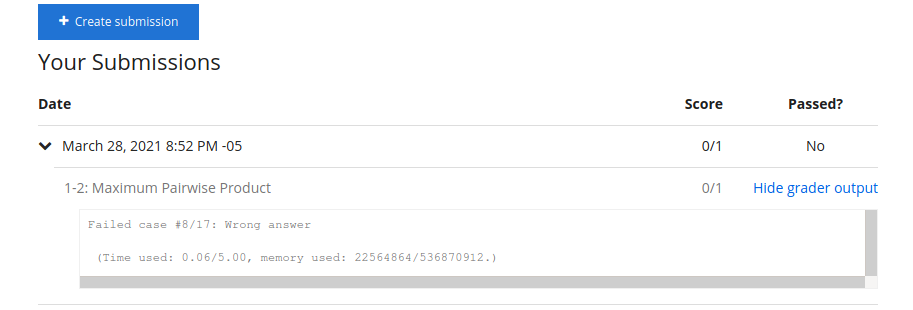

**Max pairwise product por sorting en C++**

In [ ]:
%%writefile max_pairwise_product_sorting.cpp

#include <iostream>
#include <algorithm>
using namespace std;

long long  MaxPairwiseProductSorting(long long numbers[], int n){
    sort(numbers,numbers+n);
    return numbers[n-1]*numbers[n-2];
}

int main() {

	int n=0;
	cin>>n;
	long long arr[n];
	for (int i=0 ; i<n; i++){
		cin>>arr[i];
	}
	cout<<MaxPairwiseProductSorting(arr,n)<< "\n";
	return 0;
}


In [ ]:
!g++ max_pairwise_product_sorting.cpp -o max_pairwise_product_sorting
!time ./max_pairwise_product_sorting < n_numbers.txt

A continuacion el codigo subido a coursera con 

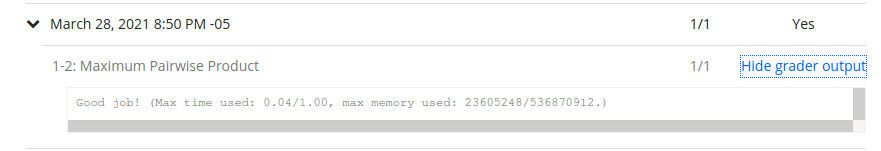

**Solucion eficiente**

Sorting en python el mismo problema de maximo producto parece ser la solucion mas eficiente al problema.

In [ ]:
%%writefile max_pairwise_product_sorting.py

def MaxPairWiseSorting(lista): 
    lista = sorted(lista)
    return lista[-1]*lista[-2]
if __name__== '__main__':
    n=int(input())
    '''
    a = list(map(int, input().split()))
    print(MaxPairWise(a))
    '''
    b=[int(x) for x in input().split()]
    print(MaxPairWiseSorting(b))

In [ ]:
!python max_pairwise_product_sorting.py < n_numbers.txt

La siguiente imagen se puede observar los 2 codigos eficientes anteriores utilizando el metodo de sorting para el lenguaje de python y en el lenguaje de C++ y son aprobadas por el juez del curso.

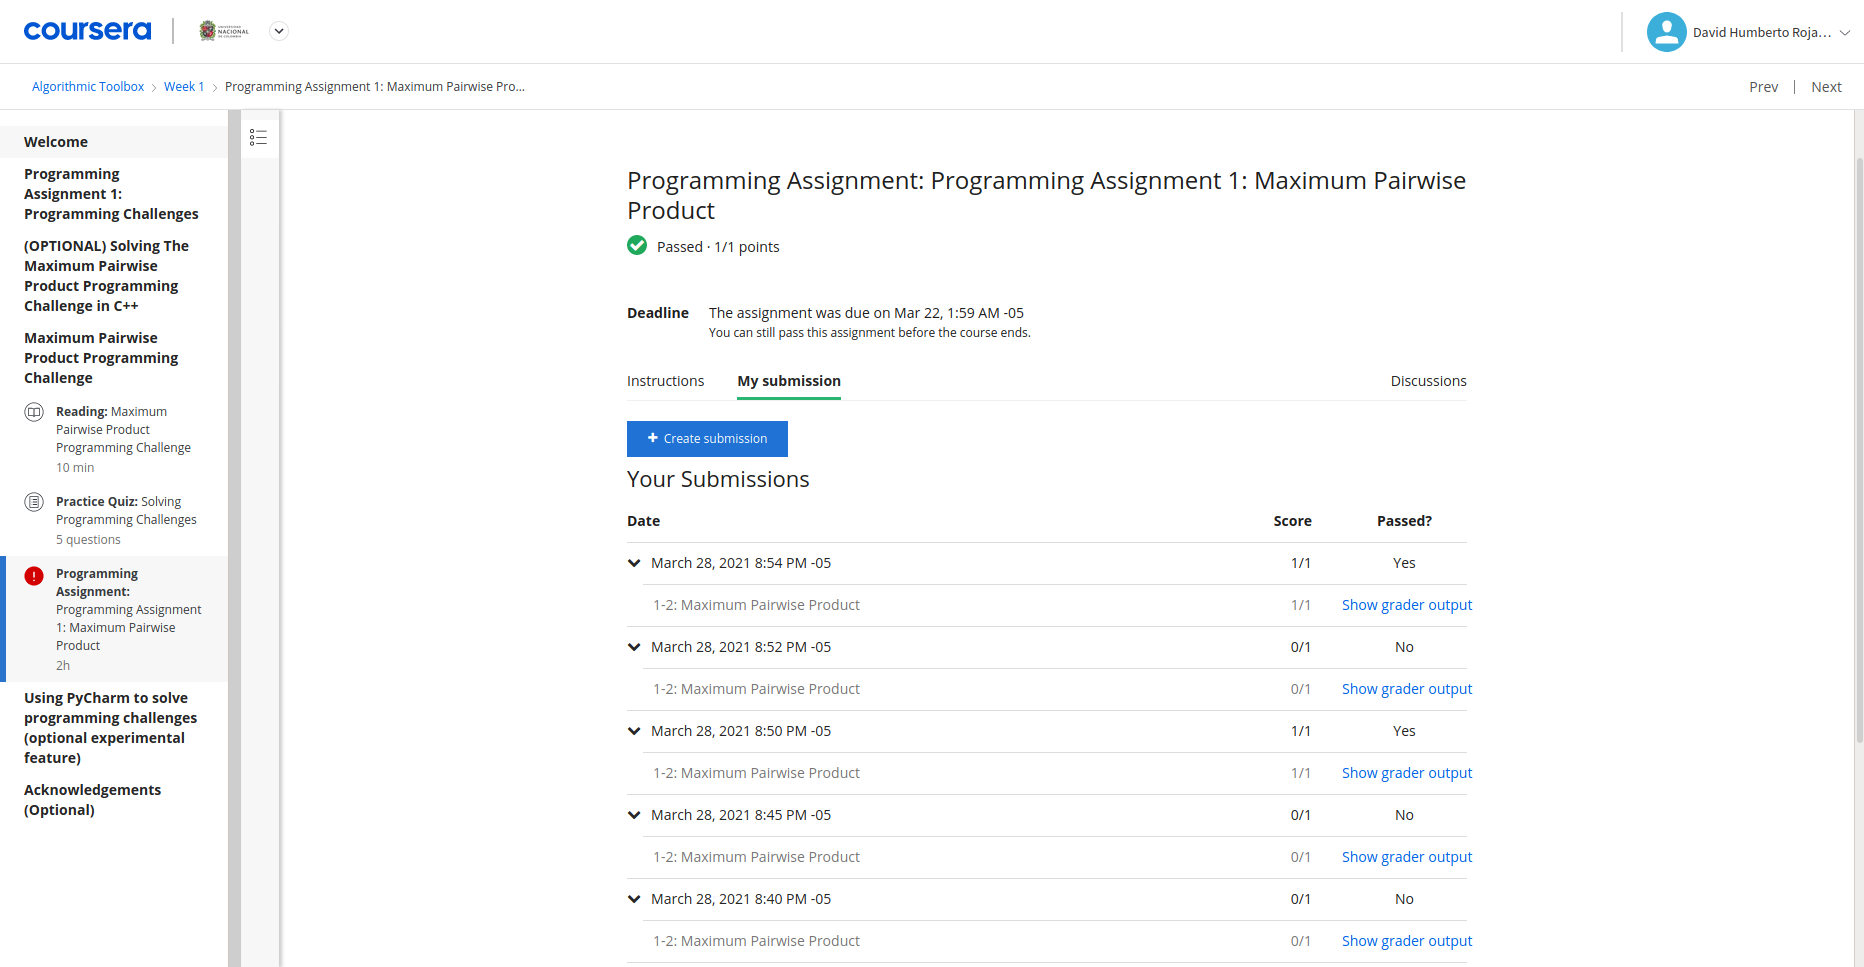

In [ ]:
**Stress Test**

In [ ]:
%%writefile stress_test.cpp

#include <iostream>
#include <algorithm>
#include <vector>
using namespace std;

int main() {
  while(true) {
      int n = rand() % 10 + 2;
      cout << n << "\n";
      vector <long long> a;
      for(int i = 0; i < n; ++i){
          a.push_back(rand() % 100000);
      }
      for(int i = 0; i < n; ++i){
          cout << a[i] << " ";
      }
      cout << "\n";
      long long res1 = MaxPairwiseProductFast(a);
      long long res2 = MaxPairwiseProduct(a);
      if(res1 != res2){
          cout << "Wrong answer: " << res1 << " " << res2 << "\n";
          break;
      }
      else{
          cout << "OK\n";
      }
  }	
}

In [ ]:
!g++ stress_test.cpp -o stress_test
!./stress_test.cpp